In [ ]:
"""
DB WAIT
20887507

"""

%matplotlib inline
%load_ext autoreload
%autoreload 2
import math
import numpy as np
from matplotlib import pylab as plt

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

#A helper-function to setup a proper plot
def setup_plot(title, y_label='', x_label='', newfig=True):
  if newfig:
    plt.figure()
  plt.margins(*(plt.array(plt.margins())+0.05))
  plt.title(title)
  plt.ylabel(y_label)
  plt.xlabel(x_label)


def fsk(bitseq, spb, f_0, f_1, F):
  T = 1/F  
  nb = bitseq.shape[0]
  num = np.array(range(0, spb))
  mn = np.zeros(shape = (spb*nb,))
  mn_len = np.array(range(0, mn.shape[0]))
  
  for i in range(0, nb):
    if (bitseq[i] == 1): 
      bit = np.sin(2*f_1*np.pi*num*T)
    if (bitseq[i] == 0):
      bit = np.sin(2*f_0*np.pi*num*T)
    mn[i*spb:(i+1)*spb] = bit
  
  return mn

def pollute(bitseq, len_f, len_b, spb, f_0, f_1, F, gain, timeshift, noise_stddev):
  T = 1/F  
  nb = bitseq.shape[0]
  num = np.array(range(0, spb)) 
  rn = np.zeros(shape = (spb*nb,))
  phase1 = 2*np.pi*f_1*timeshift
  phase0 = 2*np.pi*f_0*timeshift

  for i in range(0, nb):
    if (bitseq[i] == 1): 
      bit = np.sin(2*f_1*np.pi*num*T + phase1)
    if (bitseq[i] == 0):
      bit = np.sin(2*f_0*np.pi*num*T + phase0)
    rn[i*spb:(i+1)*spb] = bit
  
  rn = np.insert(rn, 0, np.zeros(shape = (len_f,)) )
  rn = np.append(rn, np.zeros(shape = (len_b,)) )
  wn = np.random.normal(loc=0.0, scale=noise_stddev, size=(nb*spb + len_f + len_b,))
  rn = gain*rn + wn

  setup_plot("Received Signal")
  plt.plot(rn, 'm')
  #plt.stem(rn, use_line_collection=True, markerfmt= 'g.', linefmt = 'g:')
  plt.show()
  
  return rn

def chirp_fsk(bitseq, spb, f_0, f_1, F, df):
  T = 1/F  
  nb = bitseq.shape[0]
  num = np.array(range(0, spb))
  mn = np.zeros(shape = (spb*nb,))
  mn_len = np.array(range(0, mn.shape[0]))
  chirp = np.array(range(0, spb))*(df/spb) - df/2
  print(chirp[0], chirp[spb-1])
  #print(chirp+f_1)

  for i in range(0, nb):
    if (bitseq[i] == 1): 
      bit = np.sin(2*(f_1+chirp)*np.pi*num*T)
    if (bitseq[i] == 0):
      bit = np.sin(2*(f_0-chirp)*np.pi*num*T)
    mn[i*spb:(i+1)*spb] = bit

  return mn


def chirp_fsk_pollute(bitseq, len_f, len_b, spb, f_0, f_1, F, gain, timeshift, noise_stddev, df):
  T = 1/F  
  nb = bitseq.shape[0]
  num = np.array(range(0, spb)) 
  rn = np.zeros(shape = (spb*nb,))
  phase1 = 2*np.pi*f_1*timeshift
  phase0 = 2*np.pi*f_0*timeshift
  chirp = np.array(range(int(-spb/2),int(spb/2)))*(df/2/spb)

  for i in range(0, nb):
    if (bitseq[i] == 1): 
      bit = np.sin(2*(f_1+chirp)*np.pi*num*T + phase1)
    if (bitseq[i] == 0):
      bit = np.sin(2*(f_0-chirp)*np.pi*num*T + phase0)
    rn[i*spb:(i+1)*spb] = bit
  
  rn = np.insert(rn, 0, np.zeros(shape = (len_f,)) )
  rn = np.append(rn, np.zeros(shape = (len_b,)) )
  wn = np.random.normal(loc=0.0, scale=noise_stddev, size=(nb*spb + len_f + len_b,))
  rn = gain*rn + wn
  
  return rn

#Modulation and Correlation 

**Set sampling rate and determine valid modulating frequencies**

In [ ]:
fs = 44100
Ts = 1/fs

Tb = 20e-3
samps = int(Tb*fs) 
print(samps)

n = 1
delta_f = n/(2*Tb)
print(delta_f)


f0 = delta_f*40
f1 = delta_f*80

print(f0, f1)


bits = np.array([1,0,0,1,0,1,1,1,0,0,0,1])
bits = np.array([1,1,0,1,0,0,0,1,0,1,1,1])
bits = np.array([1,0,1,0,1,1,0,1,0,1,1,1])
bits = np.array([0,0,1,0,1,0,1,0,0,1,1,1])

882
25.0
1000.0 2000.0


-50.0 49.886621315192755


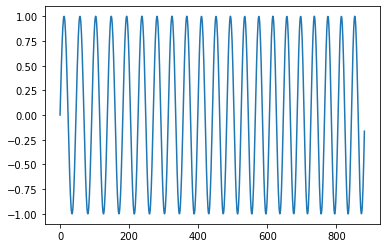

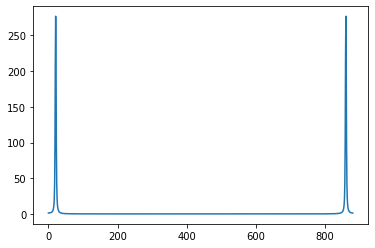

In [ ]:
b = np.array([1])
tx = chirp_fsk(bitseq = b, spb = samps, f_0 = f0, f_1 = 1000, F = fs, df = delta_f*4)
#tx = fsk(bitseq = b, spb = samps, f_0 = f0, f_1 = 1000, F = fs)
plt.plot(tx)
plt.show()

plt.plot(np.abs(np.fft.fft(tx)))
plt.show()

**Check Frequency Content and Autocorrelation of an FSK Modulated message**

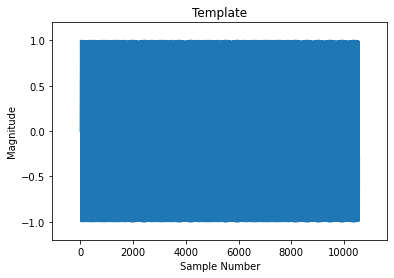

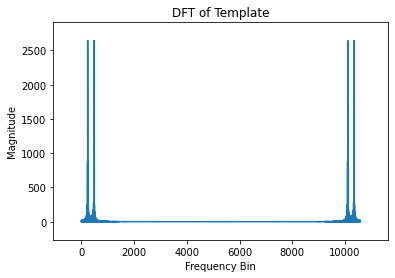

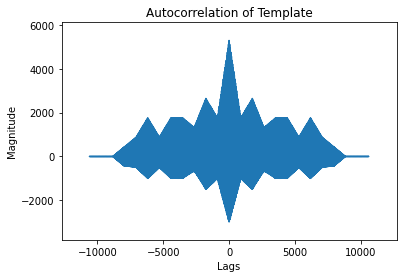

In [ ]:
tx = fsk(bitseq = bits, spb = samps, f_0 = f0, f_1 = f1, F = fs)
#tx = chirp_fsk(bitseq = bits, spb = samps, f_0 = f0, f_1 = f1, F = fs, df = delta_f*4)
setup_plot('Template', 'Magnitude', 'Sample Number')
plt.plot(tx)
plt.show()

tf = np.abs(np.fft.fft(tx))
setup_plot('DFT of Template', 'Magnitude', 'Frequency Bin')
plt.plot(tf)
plt.show()

"""
for k in range(0, samps*4):
  if tf[k] > 1000:
    print("Bin:", k)
    print("Frq:", fs*k/(tx.shape[0]))
    print("Mag:", tf[k])
"""


rtt = np.correlate(tx, tx, mode = 'full')


lags = np.array(range(-(tx.shape[0]-1), tx.shape[0]))
setup_plot('Autocorrelation of Template', 'Magnitude', 'Lags')
plt.plot(lags, rtt)
plt.savefig('template_autocorr.pdf')
plt.show()

**Define Matched Filter coefficients**

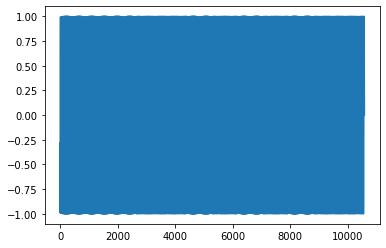

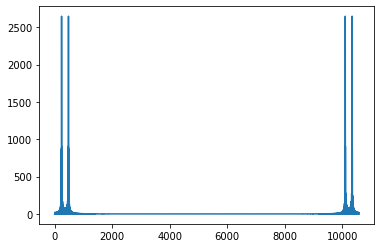

In [ ]:
mf_coef= np.flip(tx)

plt.plot(mf_coef)
plt.show()

mf_fft = np.abs(np.fft.fft(mf_coef))
plt.plot(mf_fft)
plt.show()

**Sanity Check: does convolution of filter with perfectly received signal reproduce cross-correlation function?**

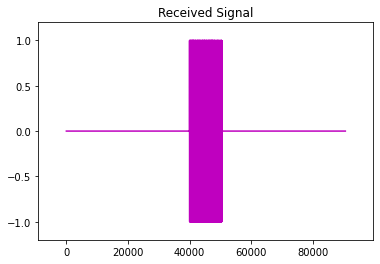

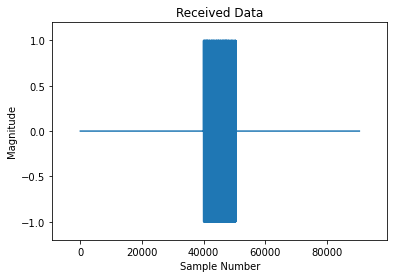

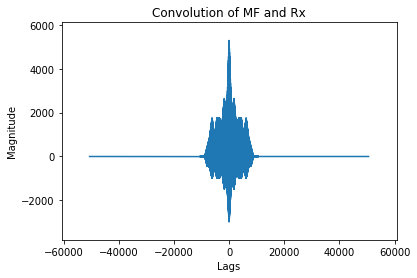

In [ ]:
padding = 40000
rx = pollute(bitseq = bits, len_f = padding, len_b= padding,spb = samps, f_0 = f0, f_1 = f1, F = fs, gain = 1, timeshift= 0, noise_stddev= 0)
#rx = chirp_fsk_pollute(bitseq = bits, len_f = padding, len_b= padding,spb = samps, f_0 = f0, f_1 = f1, F = fs, gain = 1, timeshift= 0, noise_stddev= 0, df = 4*delta_f)

setup_plot('Received Data', 'Magnitude', 'Sample Number')
plt.plot(rx)
plt.show()

conv = np.convolve(mf_coef, rx, mode = "full")

setup_plot('Convolution of MF and Rx', 'Magnitude', 'Lags')
lags = np.array(range(-(tx.shape[0]+padding-1), tx.shape[0]+padding))
plt.plot(lags, conv)
plt.show() 

#Overlap-Add Algorithm

M = 10584
L = 22144
N = 32768
90584


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


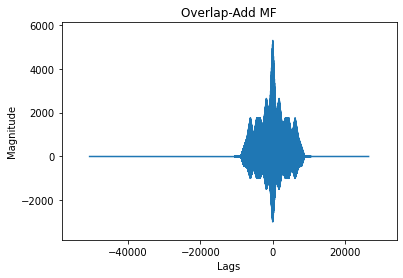

In [ ]:
M = mf_coef.shape[0]
Blocks = 173
L = 128*Blocks
N = 2**(math.ceil(math.log2(M+L-1)))
print("M =",  M)
print("L =",  L)
print("N =",  N)

mf_coef_n = np.append(mf_coef, np.zeros(shape = (N-M,)) )

mf_fft_n = np.fft.fft(mf_coef_n)

print(rx.shape[0])
yn = np.zeros(shape = (3,N), dtype= np.complex64)

for i in range(0, 3):
  index = i*L
  xn = rx[index:index+L]
  xn = np.append(xn, np.zeros(shape = (N-L,)) )
  xf = np.fft.fft(xn)
  xf = xf*mf_fft_n
  yn[i] = np.fft.ifft(xf)

ola = np.zeros(shape=(3*N,), dtype=np.complex64)

ola[0:L] = yn[0][0:L]
ola[L:N] = yn[0][L:N]
for k in range(1, 3):
  ola[k*L : N+(k-1)*L] = ola[k*L : N+(k-1)*L] + yn[k][0:N-L]
  ola[N+(k-1)*L : (k+1)*L] = yn[k][N-L:L]
  ola[(k+1)*L : N+k*L] = yn[k][L:N]


setup_plot('Overlap-Add MF', 'Magnitude', 'Lags')
lags = np.array(range(-(tx.shape[0]+padding-1), tx.shape[0]+padding))
plt.plot(lags[0:N+2*L], ola[0:N+2*L])
plt.show()

#Block Convolver

N = 4096

L = 2048

M = 2048

N = 4096
L = 2048
M = 2048


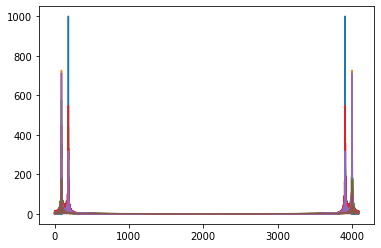

In [ ]:
L = 128*16
M = L
N = 2*L
BLOCKS = 6

print("N =",  N)
print("L =",  L)
print("M =",  M)

#Zero-Pad Filter to M*BLOCKS 
mf_coef = np.append(mf_coef, np.zeros(BLOCKS*M-mf_coef.shape[0]))

mf_coef_n = np.zeros(shape = (BLOCKS,N), dtype= np.complex64) 
mf_fft_n = np.zeros(shape = (BLOCKS,N), dtype= np.complex64)



cnt = 0
for j in range(0,BLOCKS):
  cnt = j*M
  mf_coef_n[j] = np.append(mf_coef[cnt:cnt+M] , np.zeros(shape = (N-M,)) )

  mf_fft_n[j] = np.fft.fft( mf_coef_n[j] )
  plt.plot(np.abs(mf_fft_n[j]))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


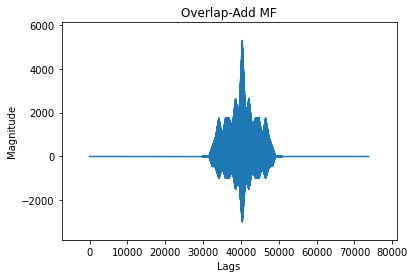

In [ ]:
xf = np.zeros(shape = (39,N), dtype= np.complex64)
yn = np.zeros(shape = (34,N), dtype= np.complex64)
ola = np.zeros(shape = (N+34*L,), )


for k in range(0, 39):
  cnt = k*L
  xf[k] = np.append( rx[cnt:cnt+L], np.zeros(shape = (N-L,), dtype= np.complex64) )
  xf[k] = np.fft.fft(xf[k])


for i in range(5,39):
  for j in range(0,6):
    yn[i-5] = yn[i-5] + xf[i-j]*mf_fft_n[j]
  yn[i-5] = np.fft.ifft(yn[i-5])


ola[0:L] = yn[0][0:L]
ola[L:N] = yn[0][L:N]
for k in range(1, 34):
  ola[k*L : N+(k-1)*L] = ola[k*L : N+(k-1)*L] + yn[k][0:N-L]
  ola[N+(k-1)*L : (k+1)*L] = yn[k][N-L:L]
  ola[(k+1)*L : N+k*L] = yn[k][L:N]


setup_plot('Overlap-Add MF', 'Magnitude', 'Lags')
lags = np.array(range(-(tx.shape[0]+padding-1), tx.shape[0]+padding))
plt.plot(ola)
plt.show()